In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
from pathlib import Path
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kapturovalexander/bank-credit-scoring")
dataset_path = Path(path).joinpath("bank.csv")

dataset = pd.read_csv(dataset_path, sep=";")
dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No null values in the dataset.

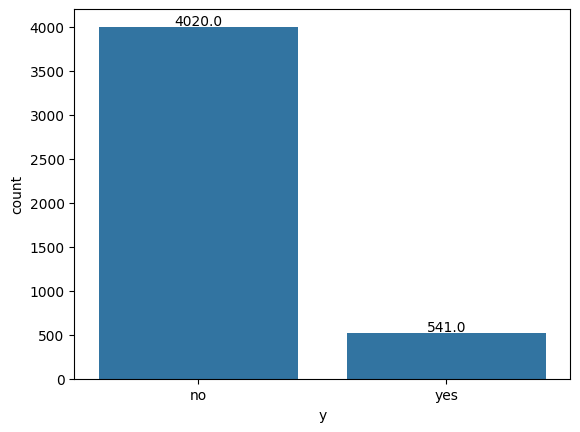

In [4]:
import seaborn as sns

ax = sns.countplot(x="y", data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, height + 20, ha="center")

In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
def f(days):
    if days < 0:
        return "No Prior Contact"
    elif 0 <= days <= 90:
        return "Recent Contact"
    elif 91 <= days <= 180:
        return "Mid-Term Contact"
    elif 181 <= days <= 365:
        return "Extended Contact"
    else:
        return "Distant Contact"

dataset["pdays"] = dataset["pdays"].map(f)

In [7]:
def f(calls):
    if calls <= 0:
        return "No Prior Contact"
    elif 0 < calls <= 10:
        return "Limited Prior Contact"
    elif 11 < calls <= 20:
        return "Some Prior Engagement"
    else:
        return "Significant Prior Engagement"

dataset["previous"] = dataset["previous"].map(f)

In [8]:
def f(calls):
    if calls <= 0:
        return "No Contact"
    elif 1 <= calls <= 3:
        return "Initial Outreach"
    elif 4 <= calls <= 7:
        return "Early Follow-Up"
    elif 8 <= calls <= 12:
        return "Consistent Engagement"
    elif 13 <= calls <= 20:
        return "Active Pursuit"
    elif 21 <= calls <= 30:
        return "High Engagement/Potential Roadblocks"
    elif 31 <= calls <= 40:
        return "Intensive Follow-Up/Escalation Likely"
    else:
        return "Excessive Outreach/Needs Review"

dataset["campaign"] = dataset["campaign"].map(f)

In [9]:
def f(calls):
    if 0 <= calls < 31:
        return "Not Interested"
    elif 31 <= calls < 2*60:
        return "Curious"
    elif 2*60 <= calls < 4*60:
        return "Interested"
    elif 4*60 <= calls < 8*60:
        return "Very Interested"
    elif 8*60 <= calls < 20*60:
        return "Highly Engaged/Invested"
    elif 20*60 <= calls < 30*60:
        return "Extremely Engaged/Potentially Complex"
    else:
        return "Requires Follow-Up/Special Handling"

dataset["duration"] = dataset["duration"].map(f)

In [10]:
def f(age):
    if 0 <= age < 19:
        return "Underage"
    elif 10 <= age < 25:
        return "Young"
    elif 25 <= age < 40:
        return "Young Adult"
    elif 40 <= age < 60:
        return "Middle Aged"
    else:
        return "Old"

dataset["age"] = dataset["age"].map(f)

In [11]:
def f(bal):
    if bal < 0:
        return "Extremely poor"
    elif 0 <= bal < 3000:
        return "Poor"
    elif 3000 <= bal < 5000:
        return "Lower middle class"
    elif 5000 <= bal < 10000:
        return "Middle class"
    elif 10000 <= bal < 30000:
        return "Upper middle class"
    else:
        return "Wealthy"

dataset["balance"] = dataset["balance"].map(f)

In [12]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,Young Adult,unemployed,married,primary,no,Poor,no,no,cellular,19,oct,Curious,Initial Outreach,No Prior Contact,No Prior Contact,unknown,no
1,Young Adult,services,married,secondary,no,Lower middle class,yes,yes,cellular,11,may,Interested,Initial Outreach,Extended Contact,Limited Prior Contact,failure,no
2,Young Adult,management,single,tertiary,no,Poor,yes,no,cellular,16,apr,Interested,Initial Outreach,Extended Contact,Limited Prior Contact,failure,no
3,Young Adult,management,married,tertiary,no,Poor,yes,yes,unknown,3,jun,Interested,Early Follow-Up,No Prior Contact,No Prior Contact,unknown,no
4,Middle Aged,blue-collar,married,secondary,no,Poor,yes,no,unknown,5,may,Interested,Initial Outreach,No Prior Contact,No Prior Contact,unknown,no


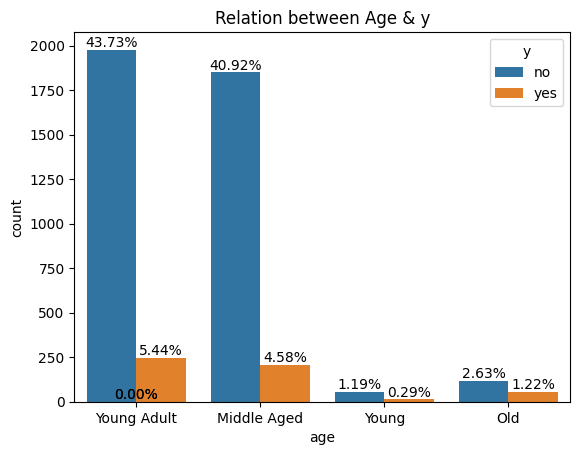

In [13]:
from matplotlib import pyplot as plt

ax = sns.countplot(x="age", hue="y", data=dataset)
plt.title("Relation between Age & y")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.2f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")

Young Adult tend to borrow more followed by middle aged, which makes sense

Let's plot the relationship between Young Adult married / unmarried vs y.

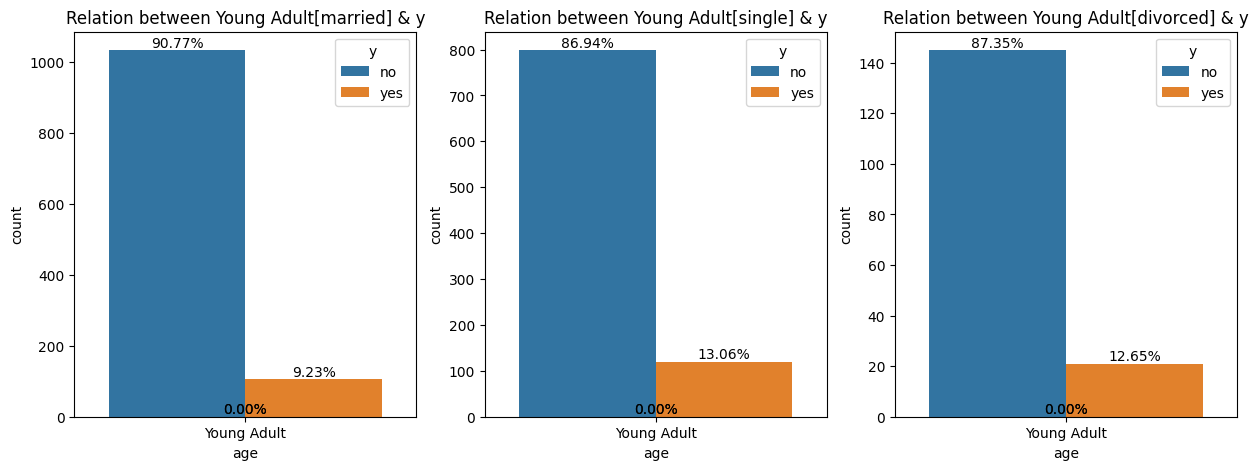

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

for i, marital_status in enumerate(dataset["marital"].unique().tolist()):
    ax = sns.countplot(
        x="age", hue="y",
        data=dataset[
            (dataset["age"] == "Young Adult") &
            (dataset["marital"] == marital_status)
        ],
        ax=axes[i]
    )
    ax.set_title(f"Relation between Young Adult[{marital_status}] & y")
    temp = len(dataset[(dataset['age'] == "Young Adult") & (dataset["marital"] == marital_status)])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

1. Single young adult are most likely to borrow, but at the time borrowing these singles might not be single, there is no way of knowing that. On the other hand, singles might be engaged and planning a family there is no way of knowing any of these.
2. Divorced men are the second top borrowers, it's likely that they borrowed when they were not single, again we don't enough information to prove or disprove this.
3. Among single, divorced and married young adults married like the least likely to borrow, may be because they have already borrowed, fortunately we can check this, Let's plot this next.

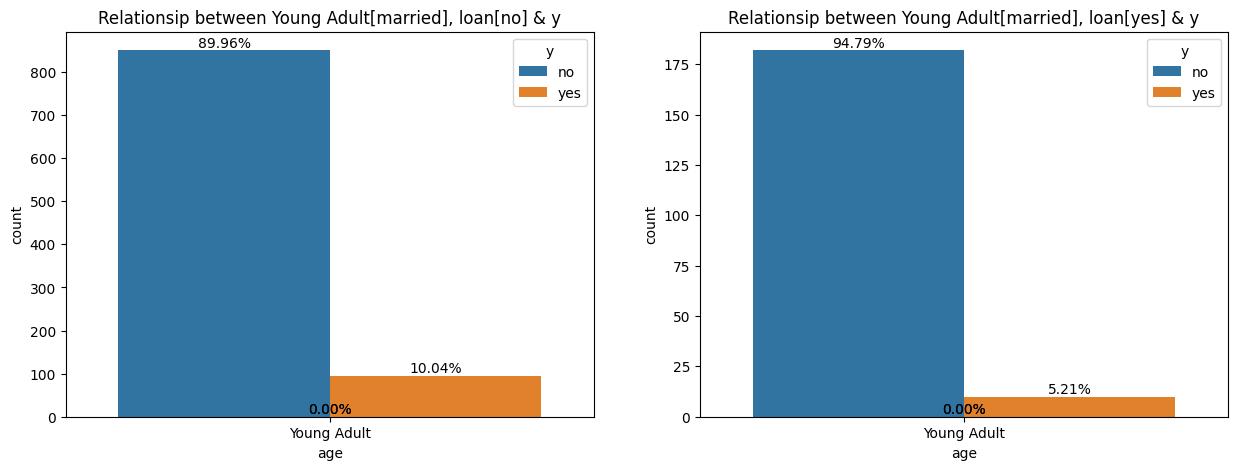

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

for i, loan in enumerate(dataset["loan"].unique().tolist()):
    ax = sns.countplot(
        x="age", hue="y",
        data=dataset[
            (dataset["age"] == "Young Adult") &
            (dataset["marital"] == "married") &
            (dataset["loan"] == loan)
        ],
        ax=axes[i]
    )
    ax.set_title(f"Relationsip between Young Adult[married], loan[{loan}] & y")
    temp = len(dataset[
        (dataset['age'] == "Young Adult") & (dataset["marital"] == "married") &
        (dataset["loan"] == loan)
    ])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

Our assumption stands correct, married young adults are least likely to borrow because they have already borrowed.

They could be borrowing to buy a house. Let's plot that next.

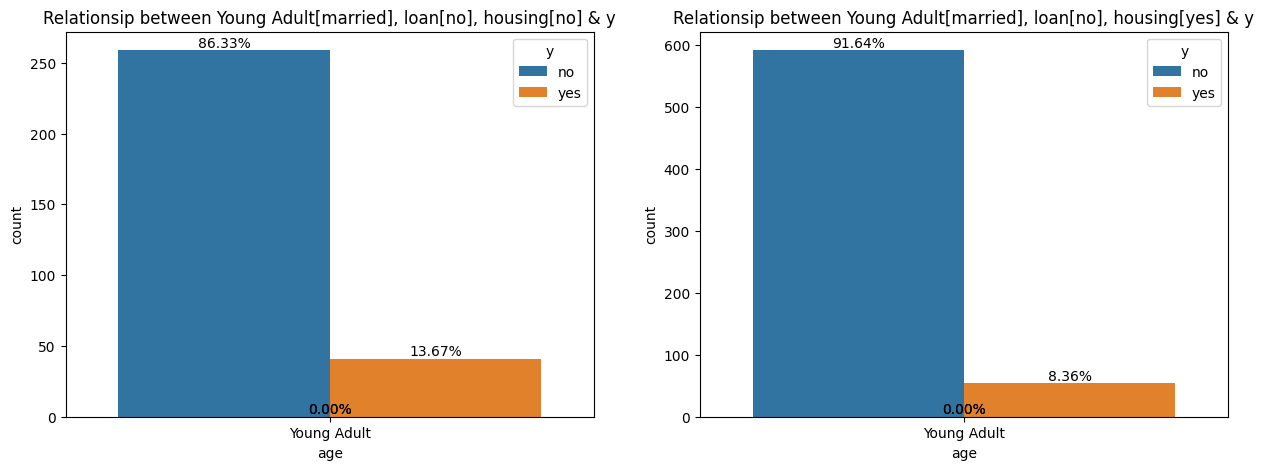

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

for i, housing in enumerate(dataset["housing"].unique().tolist()):
    ax = sns.countplot(
        x="age", hue="y",
        data=dataset[
            (dataset["age"] == "Young Adult") &
            (dataset["marital"] == "married") &
            (dataset["loan"] == "no") &
            (dataset["housing"] == housing)
        ],
        ax=axes[i]
    )
    ax.set_title(f"Relationsip between Young Adult[married], loan[no], housing[{housing}] & y")
    temp = len(dataset[
        (dataset['age'] == "Young Adult") & (dataset["marital"] == "married") &
        (dataset["loan"] == "no") & (dataset["housing"] == housing)
    ])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

Most people may be borrowing to buy a house, this trend may be true not only among married young adults.

Let's test that next.

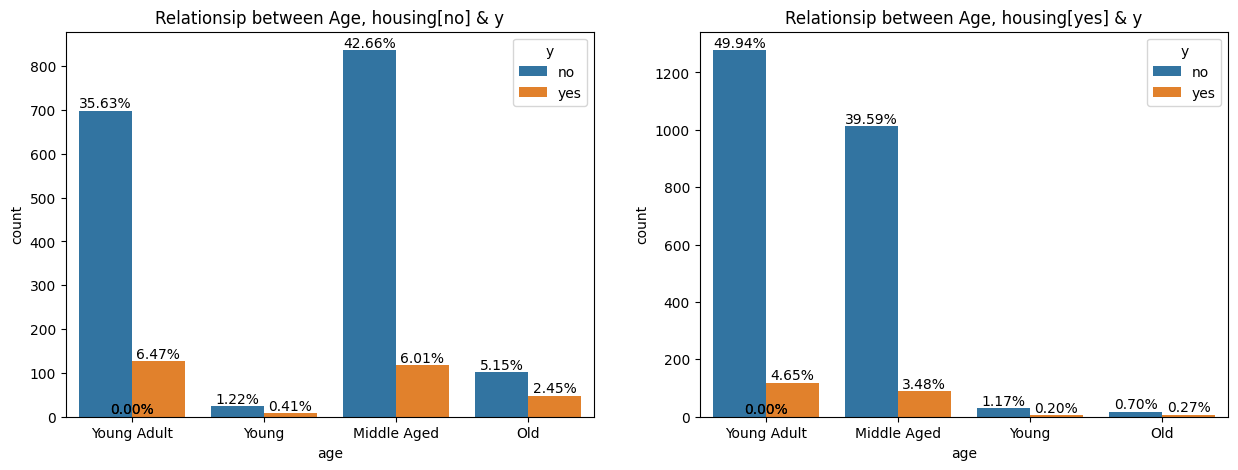

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

for i, housing in enumerate(dataset["housing"].unique().tolist()):
    ax = sns.countplot(
        x="age", hue="y",
        data=dataset[
            (dataset["housing"] == housing)
        ],
        ax=axes[i]
    )
    ax.set_title(f"Relationsip between Age, housing[{housing}] & y")
    temp = len(dataset[
        (dataset["housing"] == housing)
    ])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

People among all gender groups without housing tend to borrow more, it's likely they are borrowing to buy a house, we don't have enough to definatively prove that.

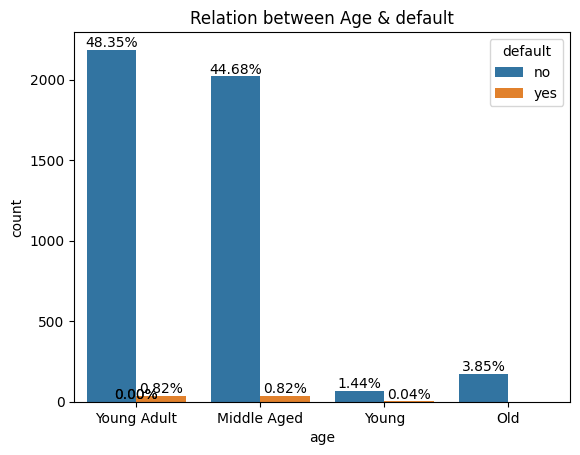

In [18]:
ax = sns.countplot(x="age", hue="default", data=dataset)
plt.title("Relation between Age & default")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.2f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")

Young Adults, and Middle Aged tend to borrow more so default would also be more, so no remakrable insights here.

/tmp/ipykernel_532006/2506450289.py:3: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(


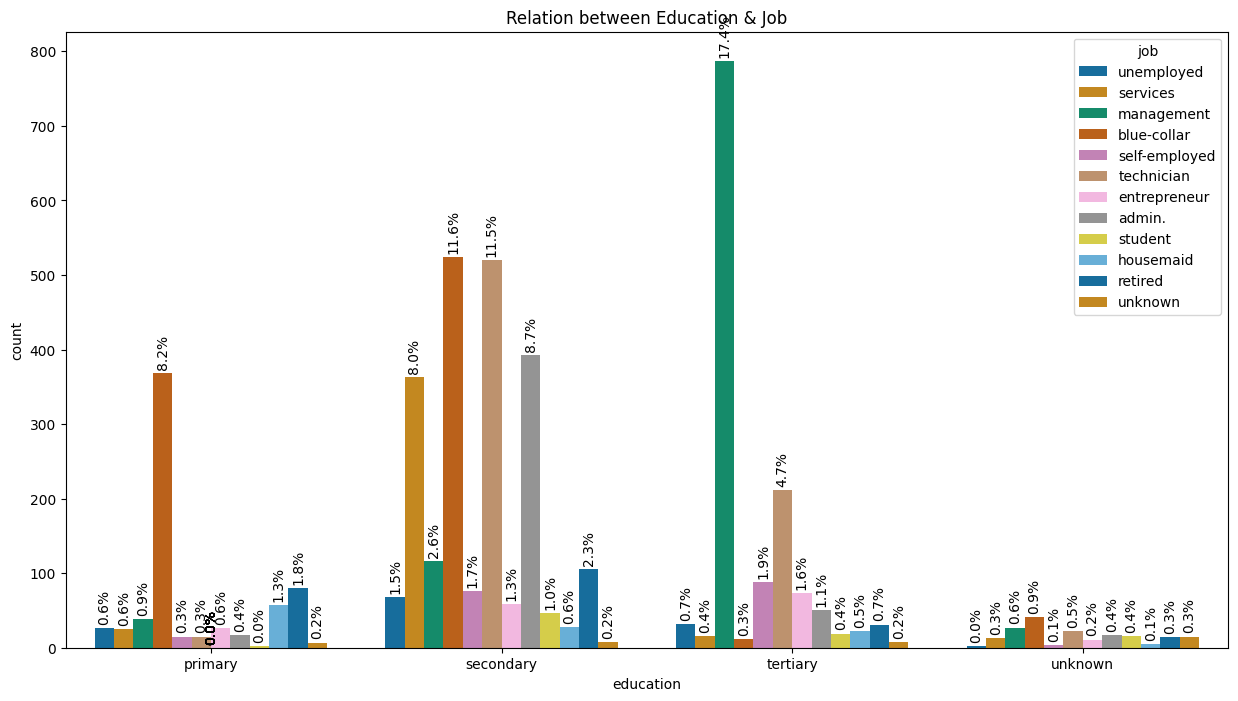

In [19]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(
    x="education", hue="job", data=dataset,
    palette=sns.color_palette("colorblind", as_cmap=False)
)
plt.title("Relation between Education & Job")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.1f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

1. Management level positions are most filled by people with tertiary level of education.
2. Blue collar jobs are most filled by people with primary and secondary level of education.
3. Technician level jobs require at least secondary level of education, and also technician jobs are second favourite by people with tertiary education.
4. Unemployment is most among people with secondary education level, followed by tertiary and primary.
5. Most entrepreneurs have tertiary education followed by secondary and primary.
6. Administration jobs are most filled by people with secondary level of education.

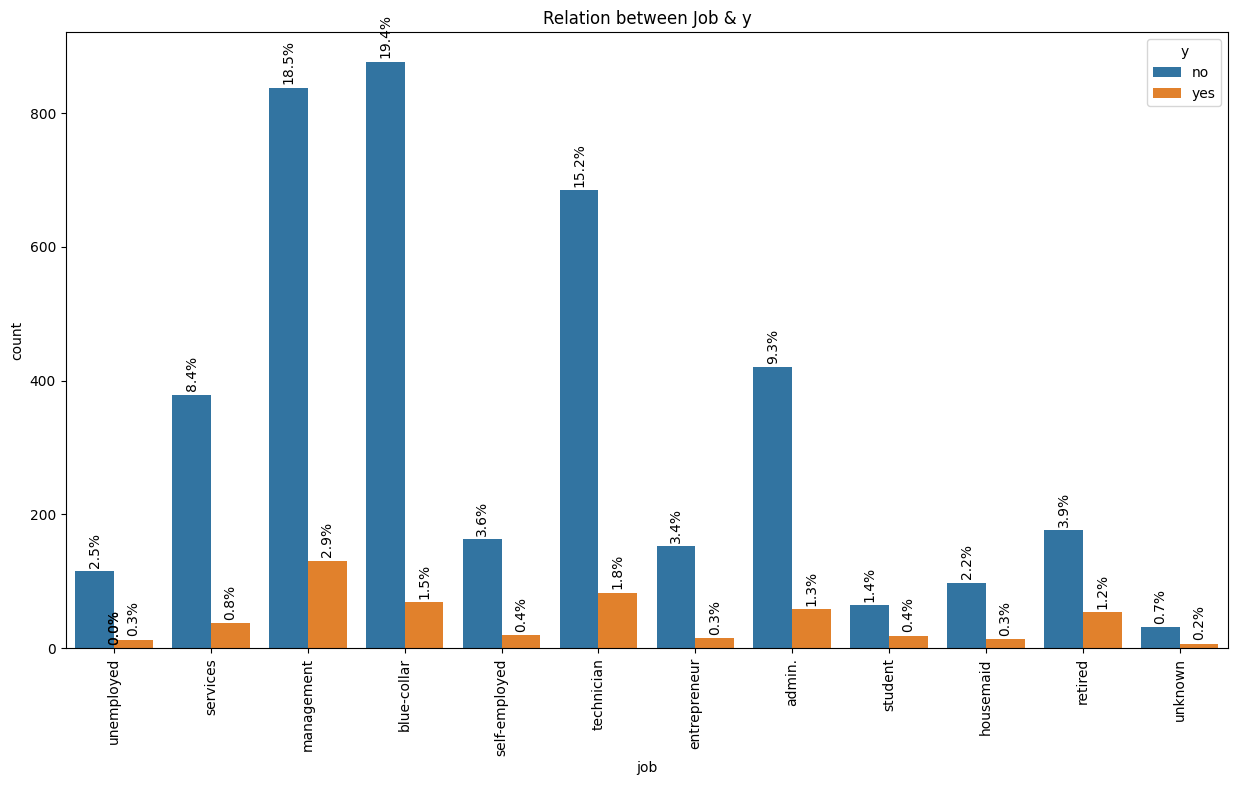

In [20]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(x="job", hue="y", data=dataset)
plt.title("Relation between Job & y")
plt.xticks(rotation=90)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.1f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

1. Top borrowers have blue-collar jobs (secondary or tertiary level of education)
2. On second top borrowers have management level jobs (tertiary education)
3. Technicians are on the 3rd spot (secondary education)
4. Administrators are fourth spot (secondary education)
5. Followed by people in service industry (secondary education)

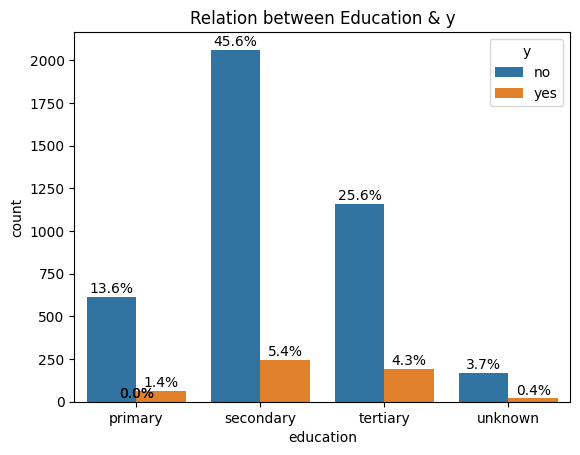

In [21]:
ax = sns.countplot(x="education", hue="y", data=dataset)
plt.title("Relation between Education & y")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.1f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom")

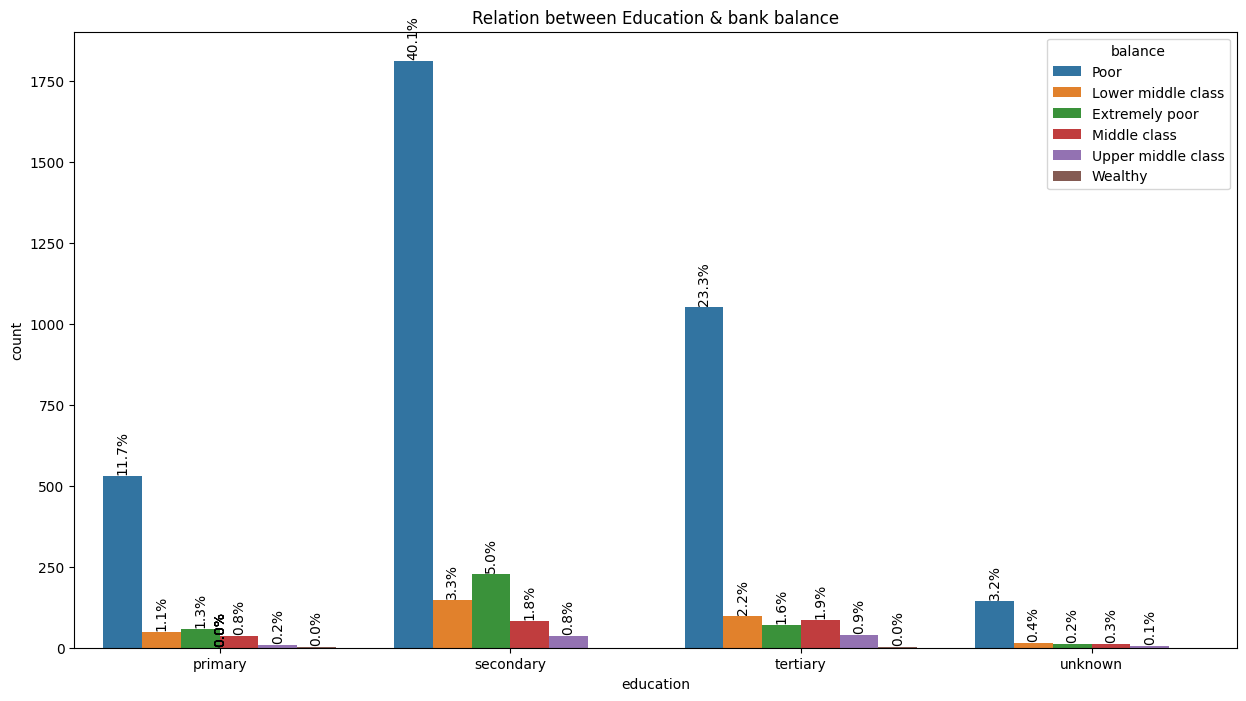

In [22]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(x="education", hue="balance", data=dataset)
plt.title("Relation between Education & bank balance")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.1f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

Most poor people have secondary level of edcation, followed by Tertiary level of education, and then primary.

Most borrowers have secondary and teriary education, and the same also are among the poorest, means chances of default also among these people also should be high.

Let's plot the relationship between defaulters and education.

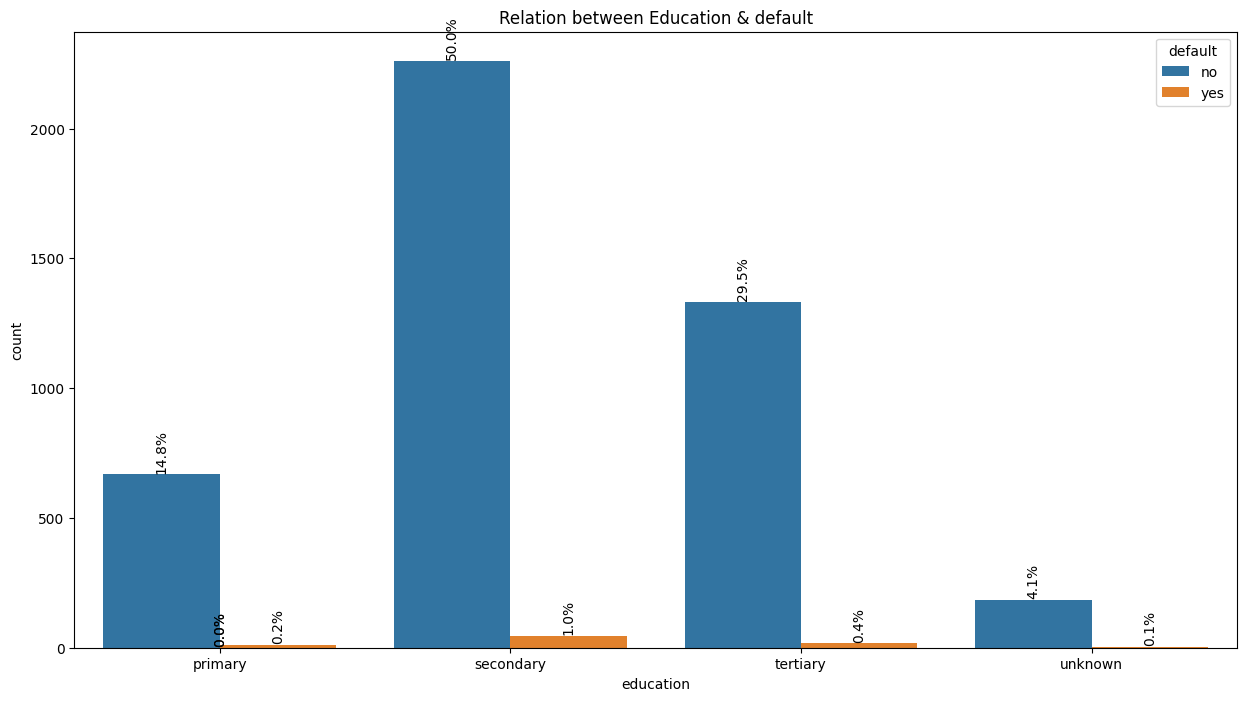

In [23]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(x="education", hue="default", data=dataset)
plt.title("Relation between Education & default")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.1f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

Our assumption stands correct, most borrowers and defaulters have secondary and tertiary level of education.

Let's see if there is any relation between time period and people borrowing.

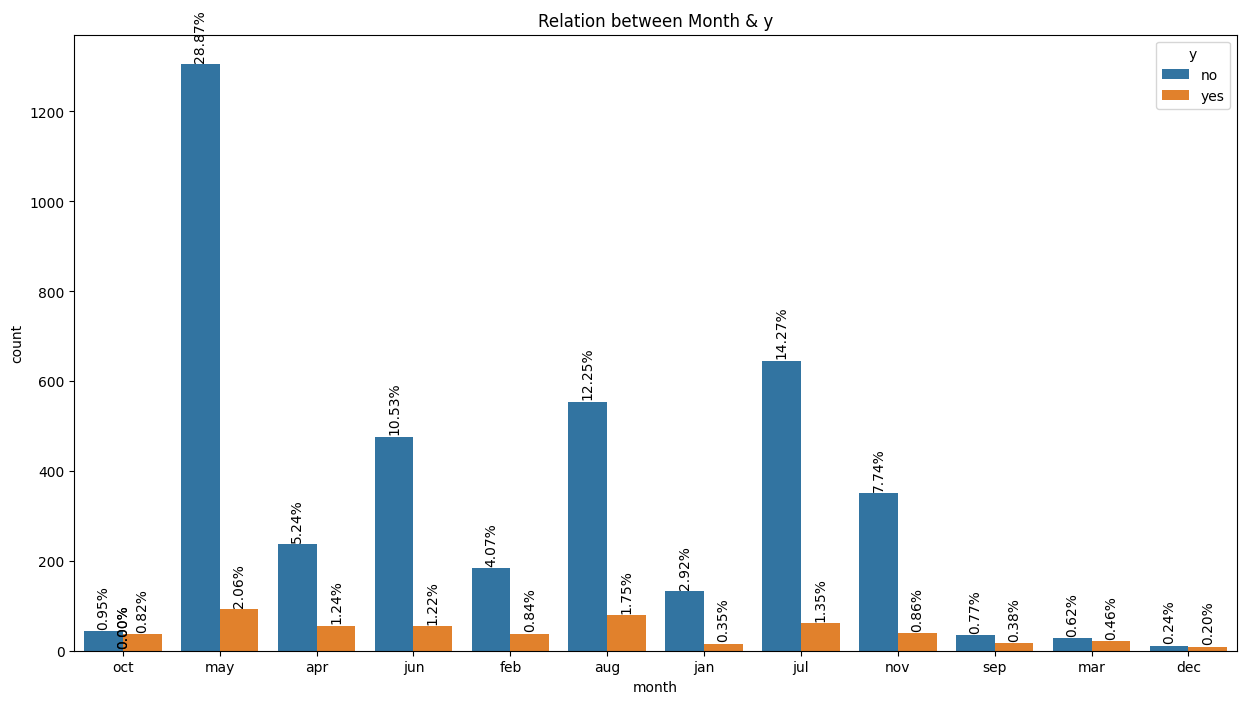

In [24]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(x="month", hue="y", data=dataset)
plt.title("Relation between Month & y")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.2f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

People borrow most in May, August, July, and April, we still don't know why

Let's plot the relation between the phone call duration and people borrowing

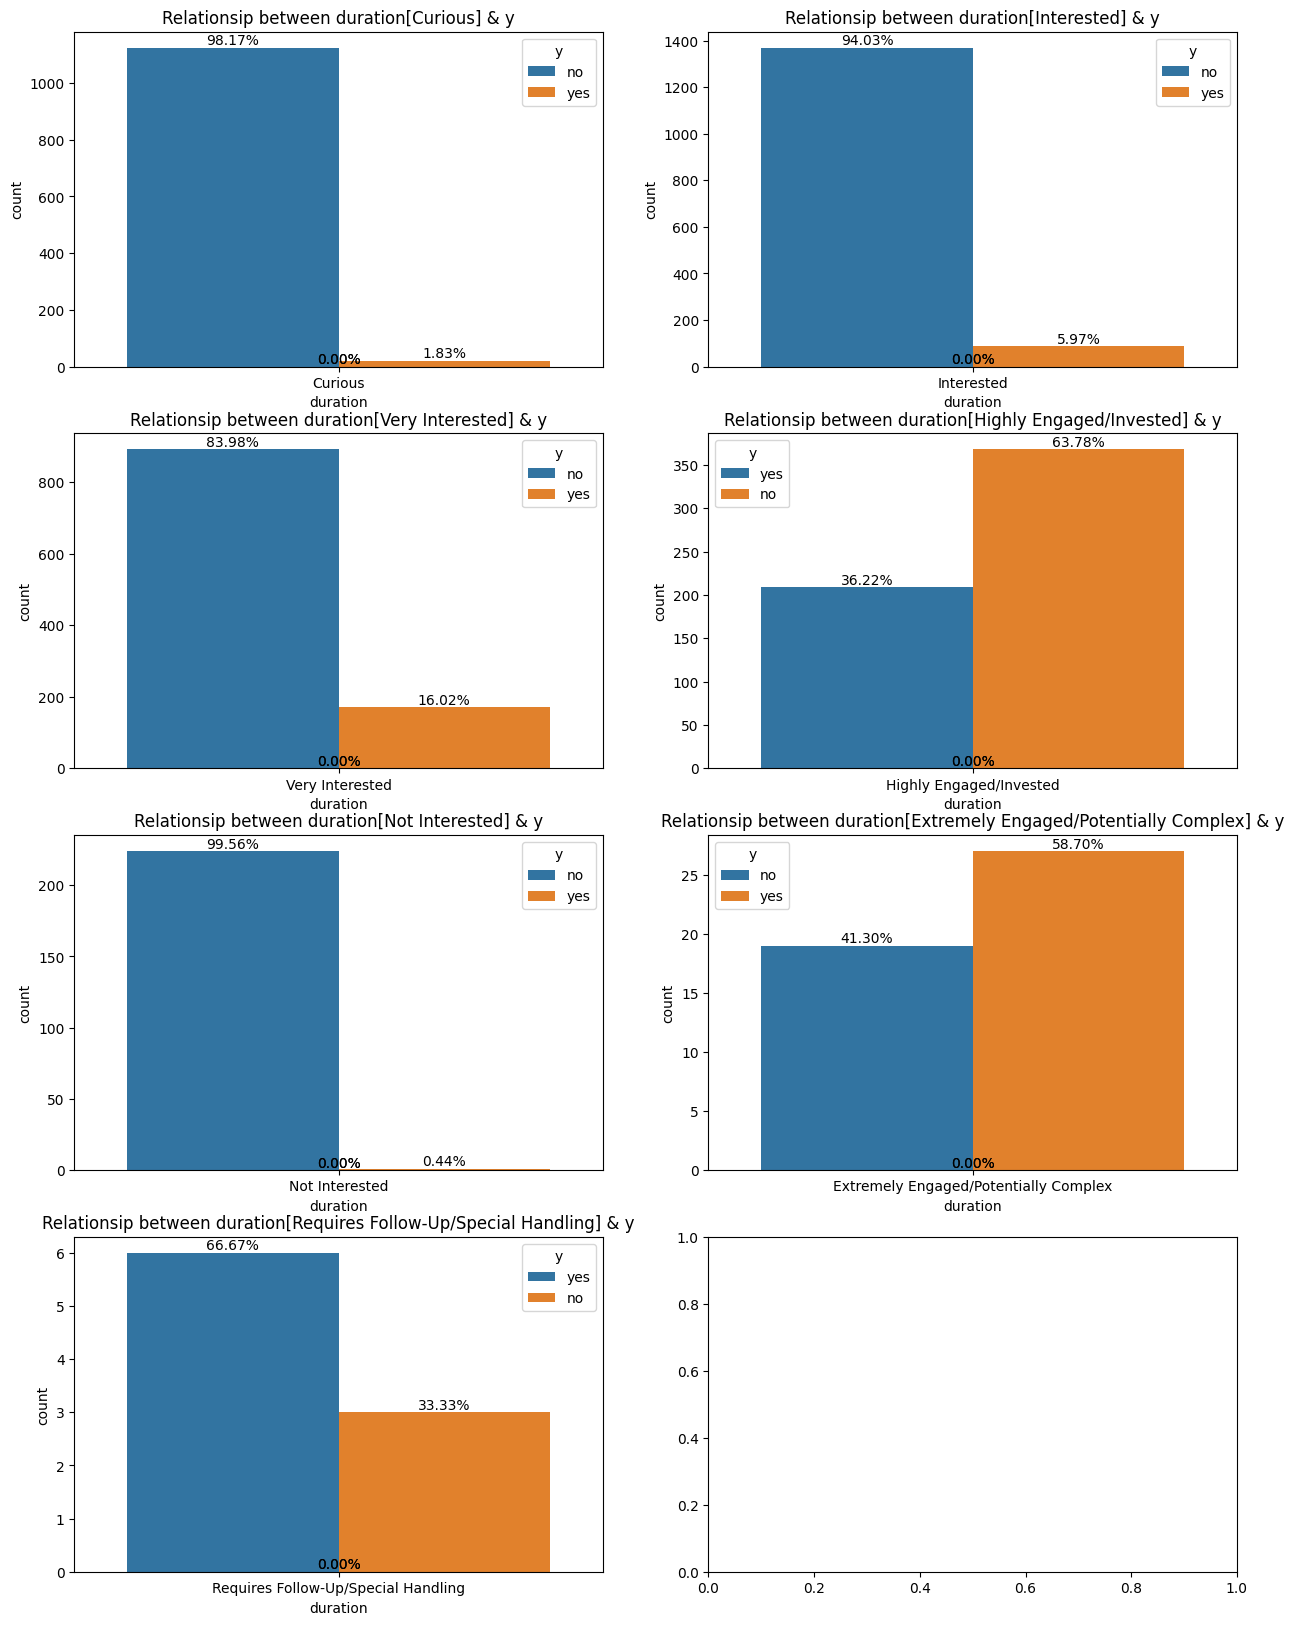

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=100)

col = 0
row = 0
for duration in dataset["duration"].unique().tolist():
    ax = sns.countplot(
        x="duration", hue="y",
        data=dataset[
            (dataset["duration"] == duration)
        ],
        ax=axes[col, row]
    )
    ax.set_title(f"Relationsip between duration[{duration}] & y")
    temp = len(dataset[
        (dataset["duration"] == duration)
    ])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

    col, row = (col + 1, 0) if row >= 1 else (col, row + 1)

Wow, very strong correlation between the phone call duration and people borrowing.

Next, let's see if it matters how they were contacted.

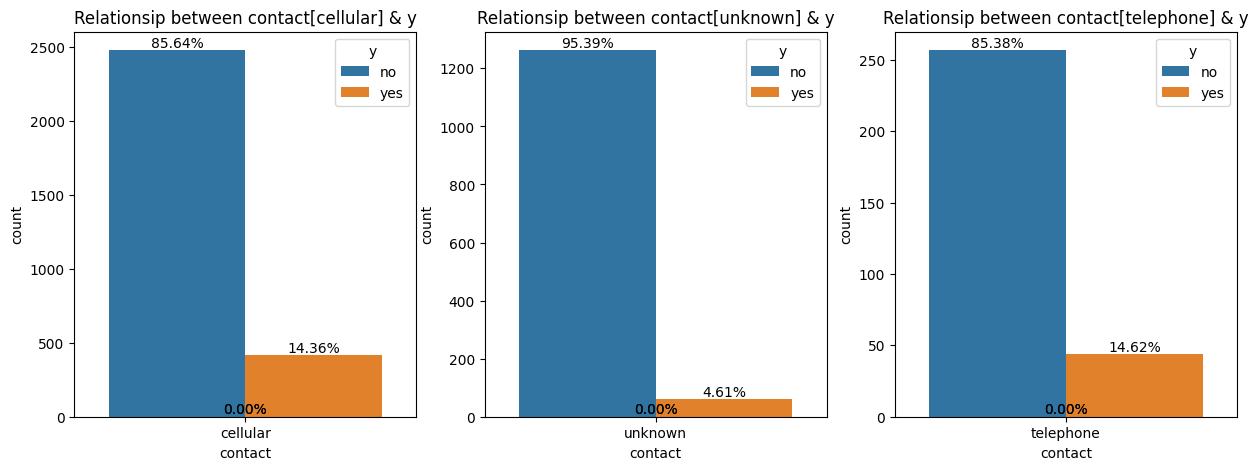

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

for i, contact in enumerate(dataset["contact"].unique().tolist()):
    ax = sns.countplot(
        x="contact", hue="y",
        data=dataset[
            (dataset["contact"] == contact)
        ],
        ax=axes[i]
    )
    ax.set_title(f"Relationsip between contact[{contact}] & y")
    temp = len(dataset[
        (dataset["contact"] == contact)
    ])
    for p in ax.patches:
        percentage = f"{100 * p.get_height() / temp:.2f}%"
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha="center", va="bottom")

Calling people over phone is likely to lead to a positive outcome.

There could be relation between peoples' job and how they are contacted. Let's see that next.

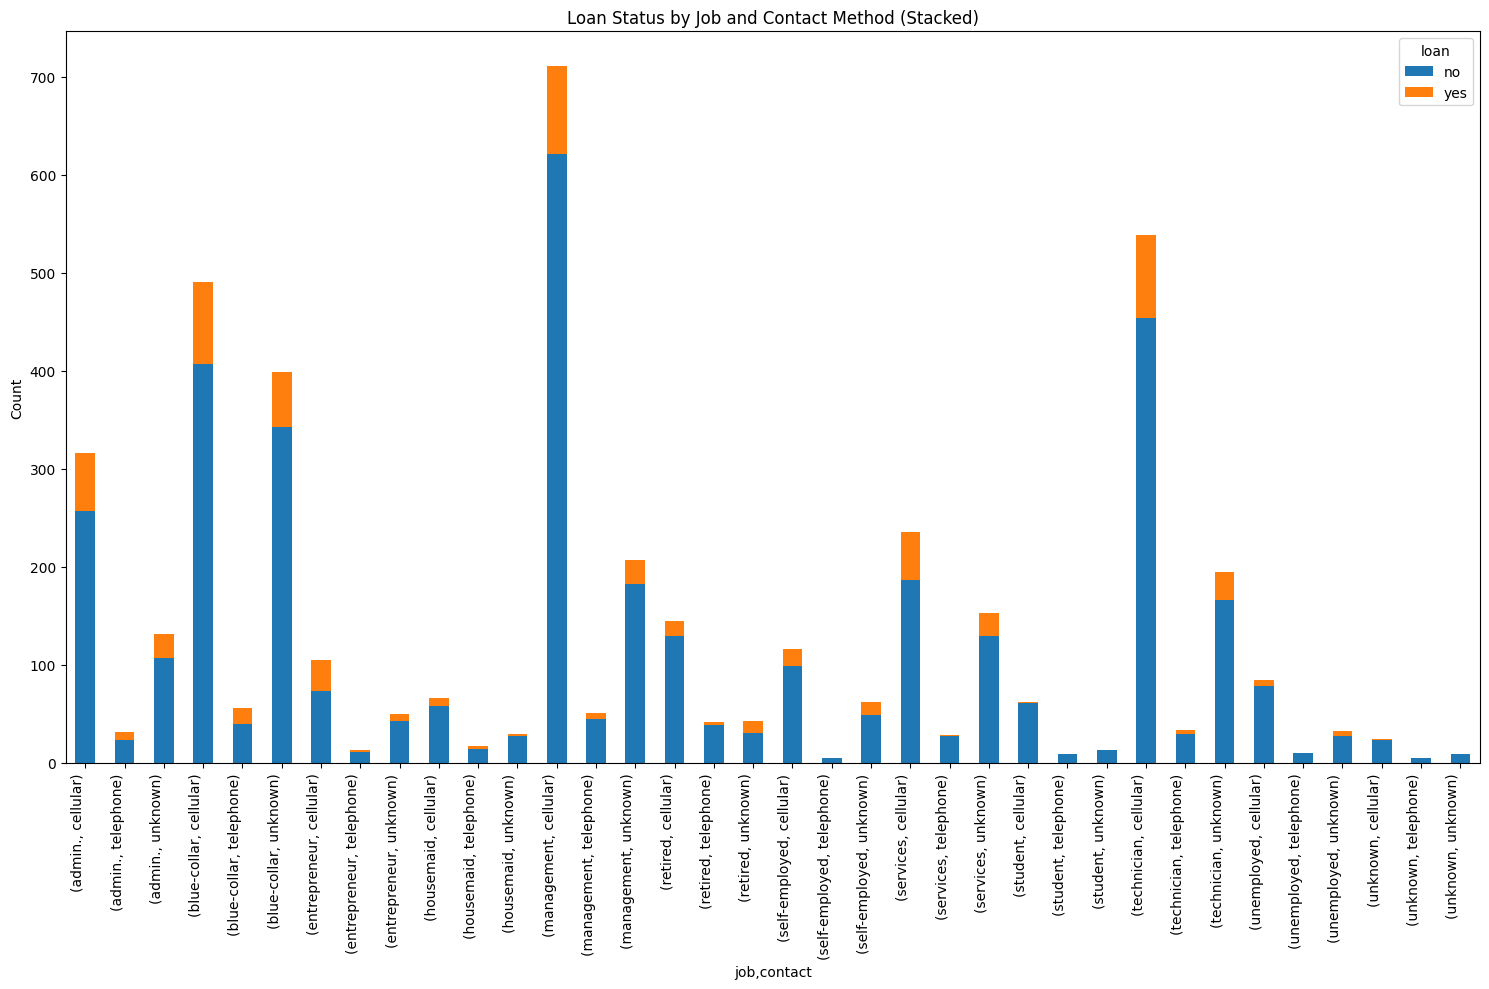

In [27]:
contingency_table = pd.crosstab(
    index=[dataset["job"], dataset["contact"]],
    columns=dataset["loan"]
)

_ = contingency_table.plot(kind="bar", stacked=True, figsize=(15, 10))
plt.title("Loan Status by Job and Contact Method (Stacked)")
plt.ylabel("Count")
plt.xticks(rotation=90, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout()

It's pretty distributed, not any ground breaking insights here.

Let's see if there is any correlation between they were previously contacted and previous contact outcome.

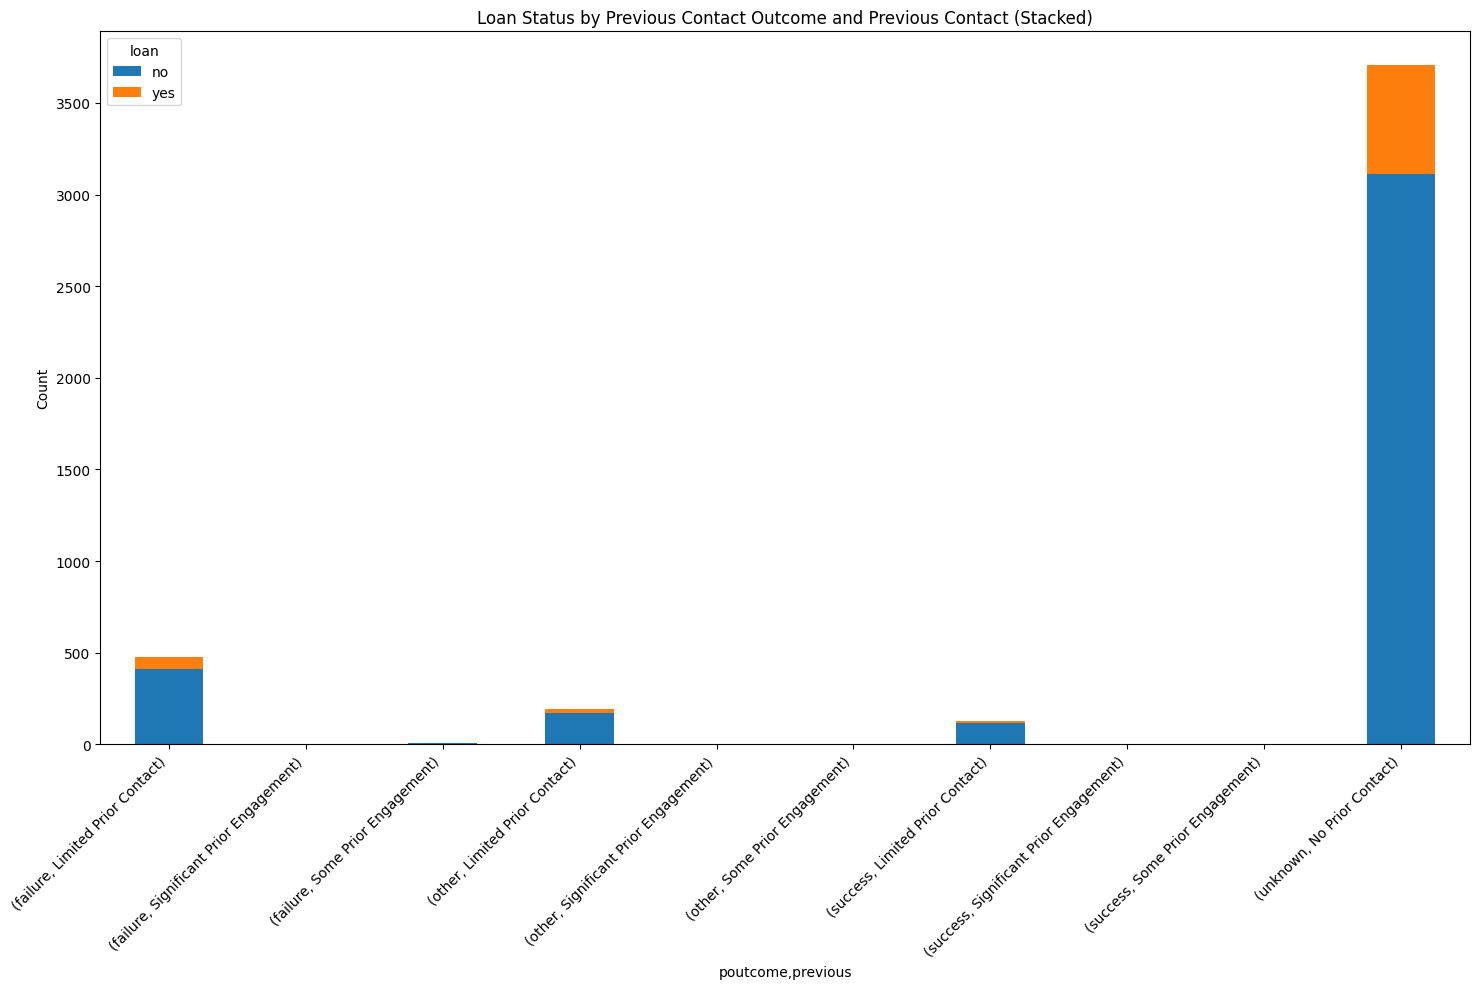

In [28]:
contingency_table = pd.crosstab(
    index=[dataset["poutcome"], dataset["previous"]],
    columns=dataset["loan"]
)

_ = contingency_table.plot(kind="bar", stacked=True, figsize=(15, 10))
plt.title("Loan Status by Previous Contact Outcome and Previous Contact (Stacked)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout()

People who were previously contacted and did not borrow and people who were not previous contacted are likely to borrow.

Let's see if there is any correlation between age and bank balance.

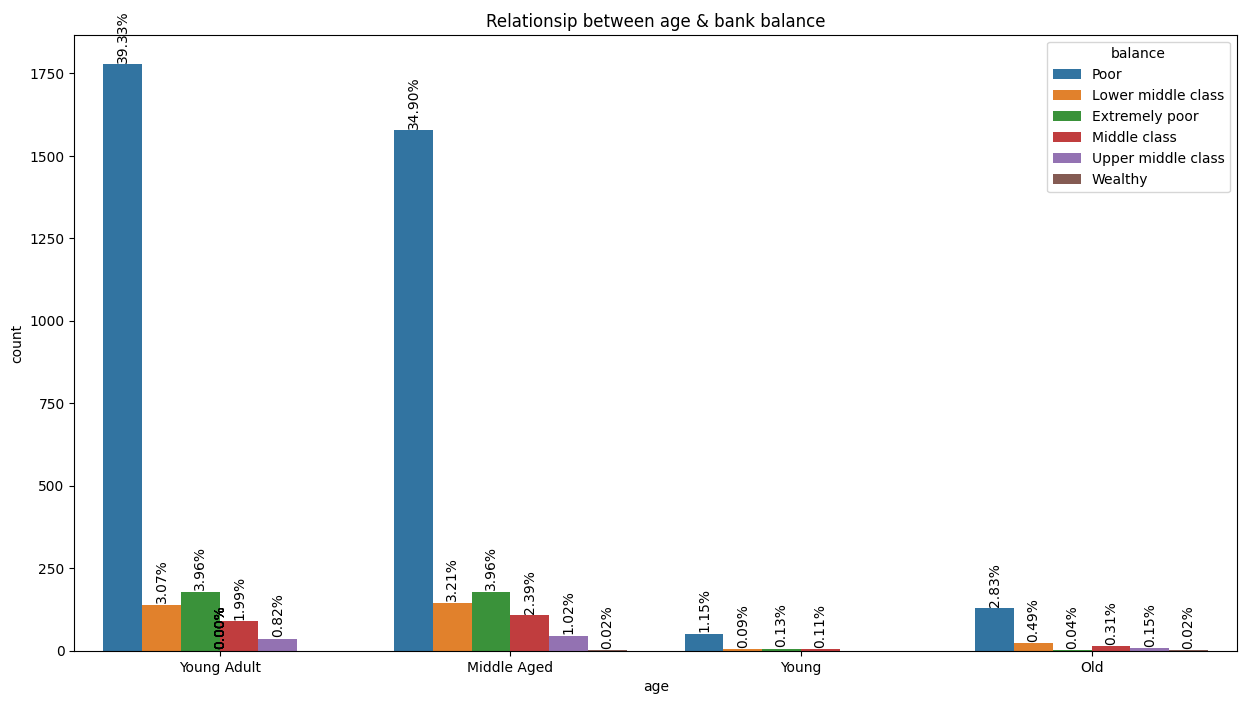

In [29]:
plt.figure(figsize=(15, 8), dpi=100)

ax = sns.countplot(x="age", hue="balance", data=dataset)
ax.set_title("Relationsip between age & bank balance")
for p in ax.patches:
    percentage = f"{100 * p.get_height() / len(dataset):.2f}%"
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha="center", va="bottom", rotation=90)

In [30]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,Young Adult,unemployed,married,primary,no,Poor,no,no,cellular,19,oct,Curious,Initial Outreach,No Prior Contact,No Prior Contact,unknown,no
1,Young Adult,services,married,secondary,no,Lower middle class,yes,yes,cellular,11,may,Interested,Initial Outreach,Extended Contact,Limited Prior Contact,failure,no
2,Young Adult,management,single,tertiary,no,Poor,yes,no,cellular,16,apr,Interested,Initial Outreach,Extended Contact,Limited Prior Contact,failure,no
3,Young Adult,management,married,tertiary,no,Poor,yes,yes,unknown,3,jun,Interested,Early Follow-Up,No Prior Contact,No Prior Contact,unknown,no
4,Middle Aged,blue-collar,married,secondary,no,Poor,yes,no,unknown,5,may,Interested,Initial Outreach,No Prior Contact,No Prior Contact,unknown,no


In [31]:
categorical_columns = dataset.select_dtypes(include="object").columns
numerical_columns = dataset.select_dtypes(include=int).columns

In [32]:
categorical_columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [33]:
numerical_columns

Index(['day'], dtype='object')

In [34]:
import cloudpickle as cp
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    encoders[column] = le

run = 1
root_path = Path("./saved-runs").joinpath(f"run-{run}")
root_path.mkdir(parents=True, exist_ok=True)

label_encoders_filepath = root_path.joinpath("encoders").joinpath("label_encoders.pkl")
label_encoders_filepath.parent.mkdir(parents=True, exist_ok=True)
with open(label_encoders_filepath, "wb") as f:
    cp.dump(encoders, f)

dataset[categorical_columns].head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,3,10,1,0,0,3,0,0,0,10,0,5,3,1,3,0
1,3,7,1,1,0,1,1,1,0,8,3,5,1,0,0,0
2,3,4,2,2,0,3,1,0,0,0,3,5,1,0,0,0
3,3,4,1,2,0,3,1,1,2,6,3,2,3,1,3,0
4,0,1,1,1,0,3,1,0,2,8,3,5,3,1,3,0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

scaler_filepath = root_path.joinpath("scaler").joinpath("standard_scaler.pkl")
scaler_filepath.parent.mkdir(parents=True, exist_ok=True)
with open(scaler_filepath, "wb") as f:
    cp.dump(scaler, f)

dataset[numerical_columns].head()

,day
0,0.374052
1,-0.596026
2,0.010273
3,-1.566105
4,-1.323585


In [36]:
dataset.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,1.543243,4.411192,1.147755,1.231365,0.016810,2.592789,0.566025,0.152842,0.652289,2.357474e-18,5.540146,2.849370,4.307896,2.728821,0.831232,2.559168,0.115240
std,1.463554,3.255716,0.599650,0.748744,0.128575,0.952329,0.495676,0.359875,0.901498,1.000111e+00,3.002763,2.144267,1.367884,0.708909,0.400837,0.992051,0.319347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.808625e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,-8.385461e-01,3.000000,0.000000,5.000000,3.000000,1.000000,3.000000,0.000000
50%,2.000000,4.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.027262e-02,6.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,3.000000,7.000000,2.000000,2.000000,0.000000,3.000000,1.000000,0.000000,2.000000,6.165717e-01,8.000000,4.000000,5.000000,3.000000,1.000000,3.000000,0.000000
max,3.000000,11.000000,2.000000,3.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.829170e+00,11.000000,6.000000,6.000000,4.000000,3.000000,3.000000,1.000000


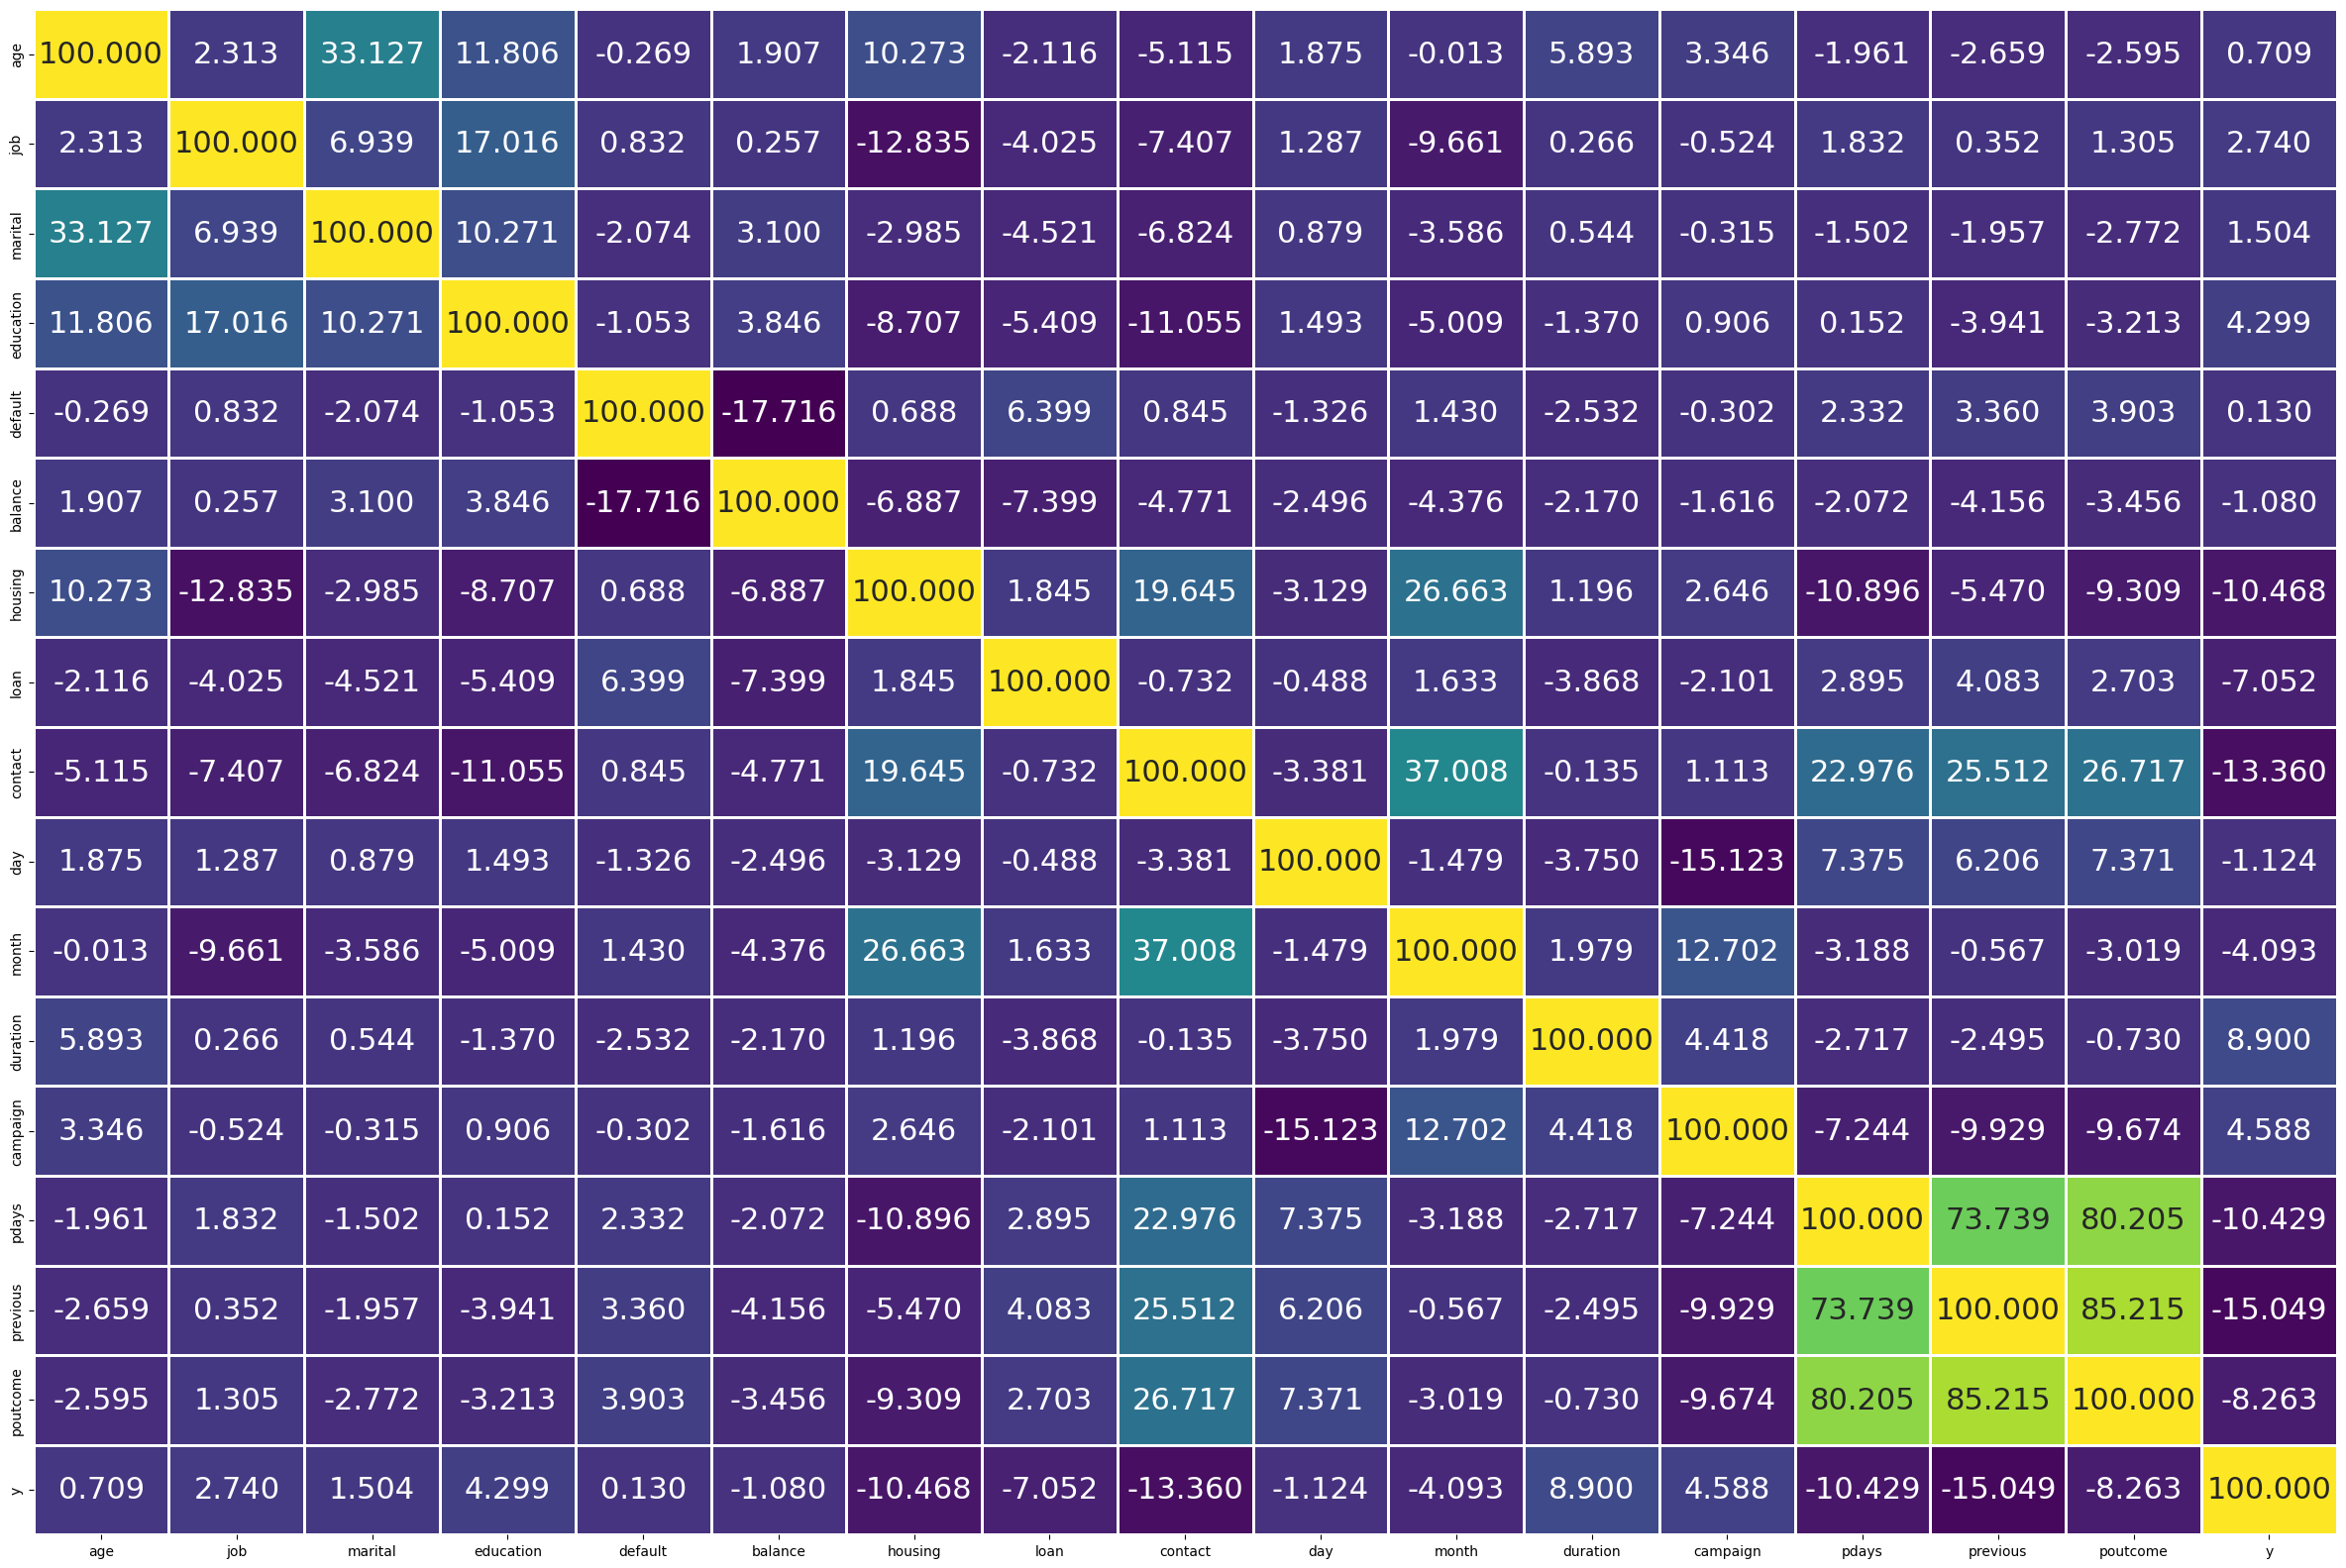

In [37]:
plt.figure(figsize=(30, 20), dpi=100) 

corr_map = dataset.corr() * 100
_ = sns.heatmap(
    corr_map, annot=True, annot_kws={"fontsize":22}, linecolor='white', \
    linewidth=1, fmt='.3f', cmap="viridis", cbar=False
)

In [38]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"], axis=1, inplace=False)
y = dataset["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 3616
Test dataset size: 905


In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(
    n_neighbors=10, weights="distance",
    # algorithm="auto", p=2, n_jobs=-1
)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [43]:
# print(model.score(X_resampled, y_resampled))
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.8861878453038674


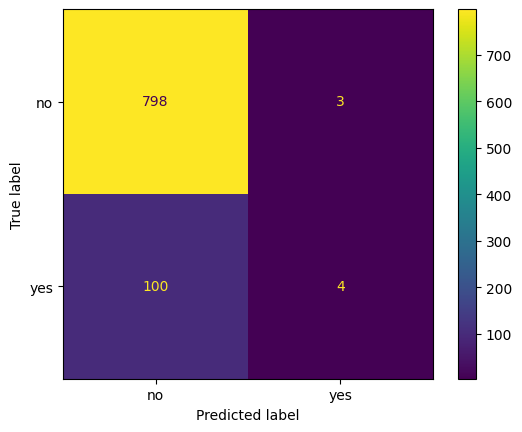

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix(y_test, model.predict(X_test)),
    display_labels=encoders["y"].inverse_transform(model.classes_)
).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))